In [249]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

import pandas as pd


In [250]:
df = pd.read_csv ('Dataset/nyc_jobs.csv')
df.head(3)

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Code No,Level,Job Category,Full-Time/Part-Time indicator,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,87990,DEPARTMENT OF BUSINESS SERV.,Internal,1,Account Manager,CONTRACT REVIEWER (OFFICE OF L,40563,1,NaN,NaN,...,"Salary range for this position is: $42,405 - $...",NaN,NaN,NaN,NaN,New York City residency is generally required ...,2011-06-24T00:00:00.000,NaN,2011-06-24T00:00:00.000,2019-07-23T00:00:00.000
1,97899,DEPARTMENT OF BUSINESS SERV.,Internal,1,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,10009,M3,NaN,F,...,NaN,"In addition to applying through this website, ...",NaN,NaN,NaN,New York City residency is generally required ...,2012-01-26T00:00:00.000,NaN,2012-01-26T00:00:00.000,2019-07-23T00:00:00.000
2,132292,NYC HOUSING AUTHORITY,External,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,...,1. A Motor Vehicle Driverâ€™s License valid i...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirements.,2013-10-24T00:00:00.000,NaN,2013-12-12T00:00:00.000,2019-07-23T00:00:00.000


In [251]:
df = df.assign(avg_sal=df.loc[:,["Salary Range From","Salary Range To"]].mean(axis=1))

In [252]:
import numpy as np

df["avg_sal"]= np.where(df["Salary Frequency"]=="Daily", (df["avg_sal"]/(5*52)).astype(int), df["avg_sal"])
df["avg_sal"]= np.where(df["Salary Frequency"]=="Annual", (df["avg_sal"]/(52*35)).astype(int), df["avg_sal"])

In [253]:
#Encoding Level and Job Category
#Categorical Encoding

def ordinal_encoding(st):
    dicts = {}
    values = range(len(st))
    keys = list(st)
    n= 0
    for i in keys:
        if n <= len(st):
            dicts[i] = n
            n = n+1
    return dicts

In [254]:
#constant variables
Agency_mapping = ordinal_encoding(set(df["Agency"]))
Posting_type_mapping = ordinal_encoding(set(df["Posting Type"]))
Business_title_mapping = ordinal_encoding(set(df["Business Title"]))
Civil_service_title_mapping = ordinal_encoding(set(df["Civil Service Title"]))
Level_mapping = ordinal_encoding(set(df["Level"]))
Job_category_mapping = ordinal_encoding(set(df["Job Category"]))
Full_part_mapping = ordinal_encoding(set(df["Full-Time/Part-Time indicator"]))
Salary_frequency_mapping = ordinal_encoding(set(df["Salary Frequency"]))
Division_unit_mapping = ordinal_encoding(set(df["Division/Work Unit"]))
residency_mapping = ordinal_encoding(set(df["Residency Requirement"]))

In [255]:
# create object of Ordinalencoding

import category_encoders as ce

encoder= ce.OrdinalEncoder(cols=['Agency','Posting Type','Business Title','Civil Service Title','Level','Job Category','Full-Time/Part-Time indicator','Salary Frequency','Division/Work Unit','Residency Requirement'],return_df=True,
                           mapping=[{'col':'Agency','mapping':Agency_mapping},
                                    {'col':'Posting Type','mapping':Posting_type_mapping},
                                    {'col':'Business Title','mapping':Business_title_mapping},
                                    {'col':'Civil Service Title','mapping':Civil_service_title_mapping},
                                    {'col':'Level','mapping':Level_mapping},
                                    {'col':'Job Category','mapping':Job_category_mapping},
                                    {'col':'Full-Time/Part-Time indicator','mapping':Full_part_mapping},
                                    {'col':'Salary Frequency','mapping':Salary_frequency_mapping},
                                    {'col':'Division/Work Unit','mapping':Division_unit_mapping},
                                    {'col':'Residency Requirement','mapping':residency_mapping}])

In [256]:
df = encoder.fit_transform(df)

In [257]:
mean_sal = int(df["avg_sal"].mean())

In [258]:
mean_sal

41

In [259]:
df["income"]= np.where(df["avg_sal"] <= mean_sal, 1, 0)

In [260]:
df = df.drop(["Job ID","Title Code No","Work Location","Job Description","Minimum Qual Requirements",
                   "Preferred Skills","Additional Information","To Apply","Hours/Shift","Work Location 1","Recruitment Contact","Posting Date",
                   "Post Until","Posting Updated","Process Date"],axis=1)

In [261]:
df.columns

Index(['Agency', 'Posting Type', '# Of Positions', 'Business Title',
       'Civil Service Title', 'Level', 'Job Category',
       'Full-Time/Part-Time indicator', 'Salary Range From', 'Salary Range To',
       'Salary Frequency', 'Division/Work Unit', 'Residency Requirement',
       'avg_sal', 'income'],
      dtype='object')

In [168]:
len(df)

3028

In [270]:
df.drop_duplicates(keep=False,inplace=True)

In [271]:
len(df)

2854

In [272]:
df.dtypes

Agency                             int32
Posting Type                       int32
# Of Positions                     int64
Business Title                     int32
Civil Service Title                int32
Level                              int32
Job Category                       int32
Full-Time/Part-Time indicator      int32
Salary Range From                float64
Salary Range To                  float64
Salary Frequency                   int32
Division/Work Unit                 int32
Residency Requirement              int32
avg_sal                          float64
income                             int32
dtype: object

In [273]:
df.head()

,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Level,Job Category,Full-Time/Part-Time indicator,Salary Range From,Salary Range To,Salary Frequency,Division/Work Unit,Residency Requirement,avg_sal,income
0,29,0,1,698,245,11,0,0,42405.00,65485.00,2,173,31,29.0,1
1,29,0,1,1190,132,3,0,2,60740.00,162014.00,2,454,31,61.0,0
2,46,1,52,391,30,17,102,2,51907.68,54580.32,2,337,15,29.0,1
3,46,0,52,391,30,17,102,2,51907.68,54580.32,2,337,15,29.0,1
4,46,0,50,742,162,17,102,2,35.00,35.00,1,365,34,35.0,1


In [274]:
feature_cols = ['Agency', 'Posting Type', '# Of Positions', 'Business Title',
       'Civil Service Title', 'Level', 'Job Category',
       'Full-Time/Part-Time indicator', 'Salary Frequency',
       'Division/Work Unit', 'Residency Requirement']
x = df[feature_cols]
y = df.income

In [275]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) # 70% training and 30% test


In [303]:
clf = DecisionTreeClassifier(criterion='gini',random_state=0, max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [304]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7281213535589265


In [305]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.62      0.67       390
           1       0.72      0.82      0.77       467

    accuracy                           0.73       857
   macro avg       0.73      0.72      0.72       857
weighted avg       0.73      0.73      0.72       857



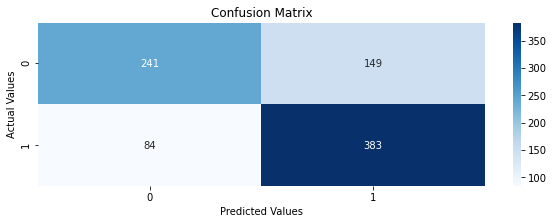

In [306]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,3))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

[Text(167.4, 190.26, 'X[10] <= 39.5\ngini = 0.496\nsamples = 1997\nvalue = [910, 1087]'),
 Text(83.7, 135.9, 'X[10] <= 18.5\ngini = 0.463\nsamples = 1503\nvalue = [548, 955]'),
 Text(41.85, 81.53999999999999, 'X[2] <= 4.5\ngini = 0.384\nsamples = 312\nvalue = [231, 81]'),
 Text(20.925, 27.180000000000007, 'gini = 0.329\nsamples = 275\nvalue = [218, 57]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.456\nsamples = 37\nvalue = [13, 24]'),
 Text(125.55000000000001, 81.53999999999999, 'X[4] <= 50.0\ngini = 0.391\nsamples = 1191\nvalue = [317, 874]'),
 Text(104.625, 27.180000000000007, 'gini = 0.134\nsamples = 264\nvalue = [19, 245]'),
 Text(146.475, 27.180000000000007, 'gini = 0.436\nsamples = 927\nvalue = [298, 629]'),
 Text(251.10000000000002, 135.9, 'X[5] <= 10.5\ngini = 0.392\nsamples = 494\nvalue = [362, 132]'),
 Text(209.25, 81.53999999999999, 'X[2] <= 1.5\ngini = 0.162\nsamples = 191\nvalue = [174, 17]'),
 Text(188.32500000000002, 27.180000000000007, 'gini = 0.083\nsampl

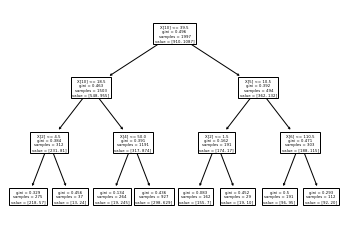

In [307]:
tree.plot_tree(clf)

[Text(465.0, 528.5, 'X[10] <= 39.5\ngini = 0.496\nsamples = 1997\nvalue = [910, 1087]'),
 Text(232.5, 377.5, 'X[10] <= 18.5\ngini = 0.463\nsamples = 1503\nvalue = [548, 955]'),
 Text(116.25, 226.5, 'X[2] <= 4.5\ngini = 0.384\nsamples = 312\nvalue = [231, 81]'),
 Text(58.125, 75.5, 'gini = 0.329\nsamples = 275\nvalue = [218, 57]'),
 Text(174.375, 75.5, 'gini = 0.456\nsamples = 37\nvalue = [13, 24]'),
 Text(348.75, 226.5, 'X[4] <= 50.0\ngini = 0.391\nsamples = 1191\nvalue = [317, 874]'),
 Text(290.625, 75.5, 'gini = 0.134\nsamples = 264\nvalue = [19, 245]'),
 Text(406.875, 75.5, 'gini = 0.436\nsamples = 927\nvalue = [298, 629]'),
 Text(697.5, 377.5, 'X[5] <= 10.5\ngini = 0.392\nsamples = 494\nvalue = [362, 132]'),
 Text(581.25, 226.5, 'X[2] <= 1.5\ngini = 0.162\nsamples = 191\nvalue = [174, 17]'),
 Text(523.125, 75.5, 'gini = 0.083\nsamples = 162\nvalue = [155, 7]'),
 Text(639.375, 75.5, 'gini = 0.452\nsamples = 29\nvalue = [19, 10]'),
 Text(813.75, 226.5, 'X[6] <= 110.5\ngini = 0.471\ns

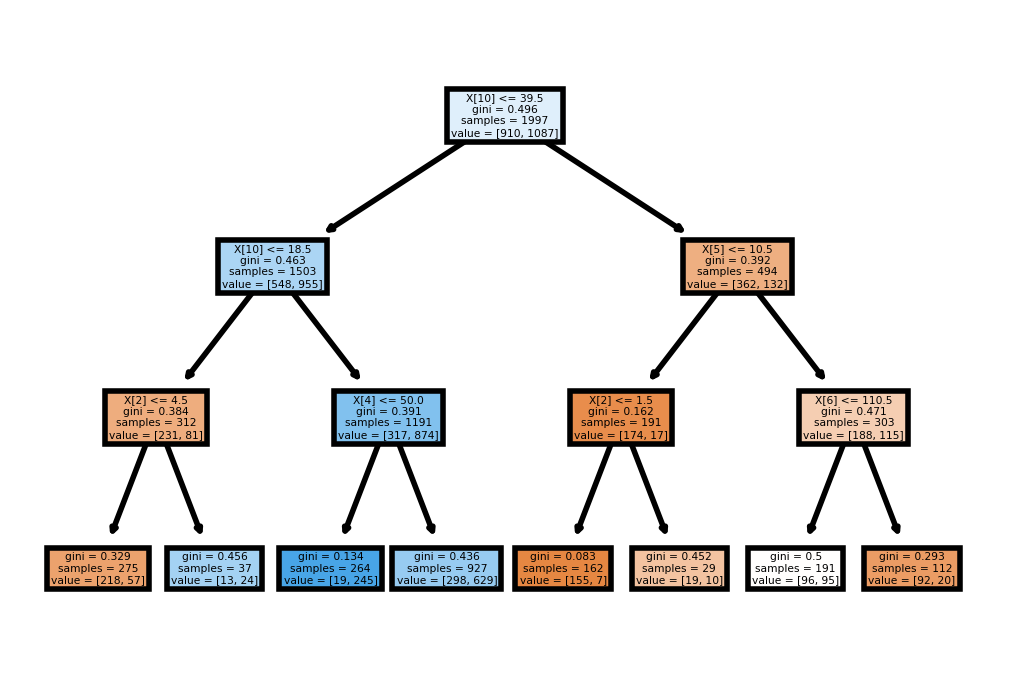

In [316]:
#Overview of generated Decision Tree
from matplotlib import pyplot as plt
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,2), dpi=400)
tree.plot_tree(clf, filled=True)